In [4]:
#Proceso de segmentación metodo Otsu

In [76]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

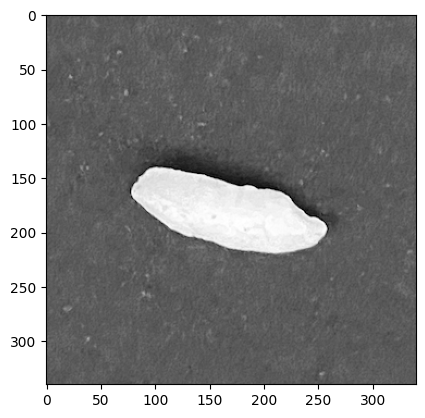

In [83]:
imagen_arroz = cv.imread('imagenes/onerice.png',0)
plt.imshow(imagen_arroz, 'gray')

In [81]:
def imhist(imgen_gris):
    a,b = imgen_gris.shape
    escala = np.zeros(256, dtype=int)
    for i in range(a):
        for j in range(b):
            escala[imgen_gris[i,j] - 1] = escala[imgen_gris[i,j] - 1] + 1

    plt.plot(escala)

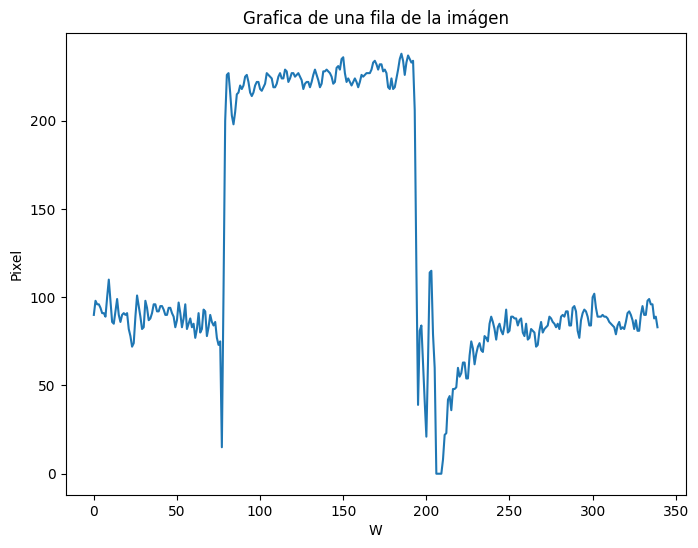

In [84]:
line_ = imagen_arroz[160] #fila 160
plt.figure(figsize=(8, 6))
plt.plot(line_)

# Añadir etiquetas y título
plt.title('Grafica de una fila de la imágen')
plt.xlabel('W')
plt.ylabel('Pixel')

# Mostrar la gráfica
plt.show()

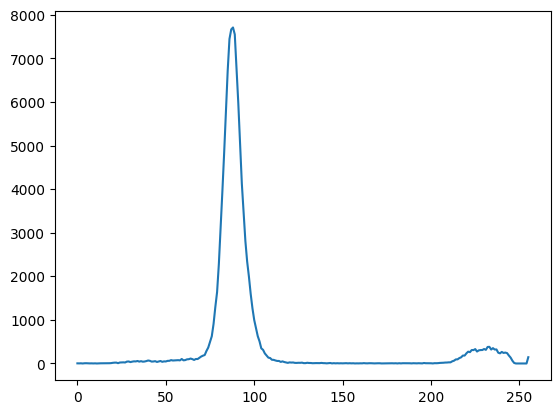

In [86]:
imhist(imagen_arroz)

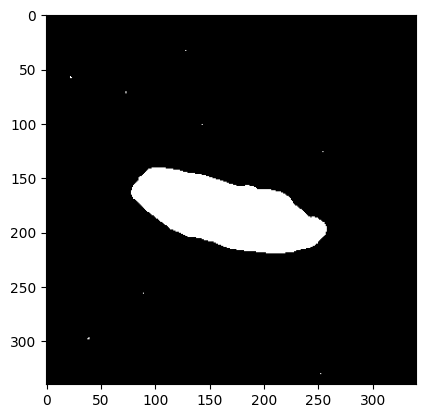

In [99]:
Sarroz = imagen_arroz > 150
Sarroz = Sarroz.astype(int) #0,1
plt.imshow(Sarroz, 'gray')

In [105]:
#kernel = np.ones((3,3))
#arroz_segmentado = cv.erode(Sarroz,kernel,iterations = 1)
#plt.imshow(arroz_segmentado, 'gray')

In [104]:
h, w = Sarroz.shape
total = h * w
print("Total de pixeles:", total, " pixeles")
contador = 0
for fila in Sarroz:
    for elemento in fila:
        if elemento == 1:
            contador = contador + 1

print("Area:", contador)
print("% Area:", 100 * contador / total, "%")

Total de pixeles: 115600  pixeles
Area: 8800
% Area: 7.612456747404845 %


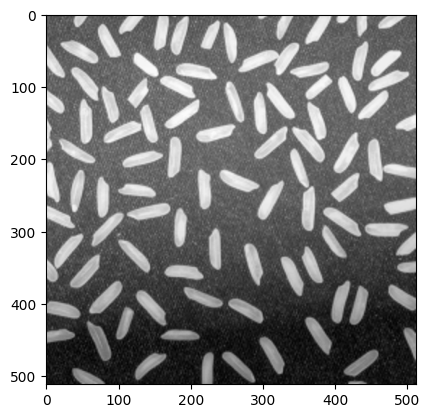

In [114]:
image_new = cv.imread('imagenes/rices.png',0)
plt.imshow(image_new, 'gray')
#0, 255

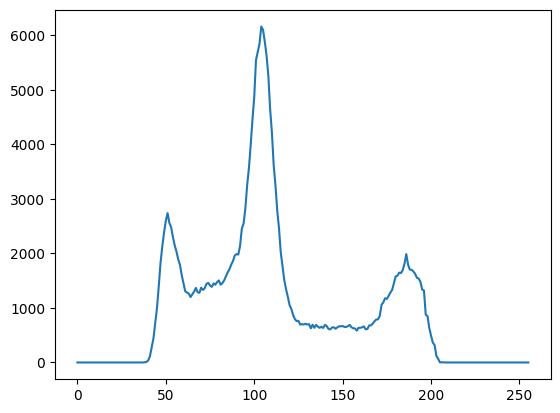

In [107]:
histg = cv.calcHist([image_new],[0],None,[256],[0,256])
plt.plot(histg) 
plt.show()

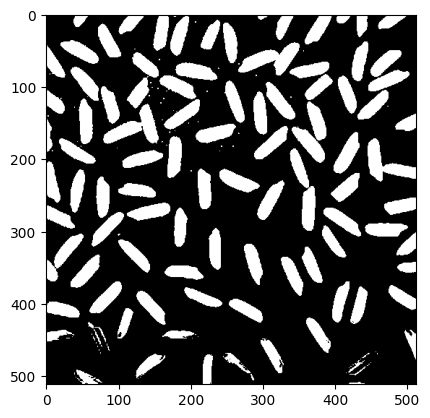

In [108]:
ret,thresh2 = cv.threshold(image_new,127,255,cv.THRESH_BINARY)
plt.imshow(thresh2, 'gray')

In [109]:
def filterImage(image):
    a,b = image.shape
    temp = np.zeros((a, b))
    i = 0
    for row in image:
        minimun = np.min(row)
        row = row - minimun
        temp[i] = row
        i = i + 1
    return temp

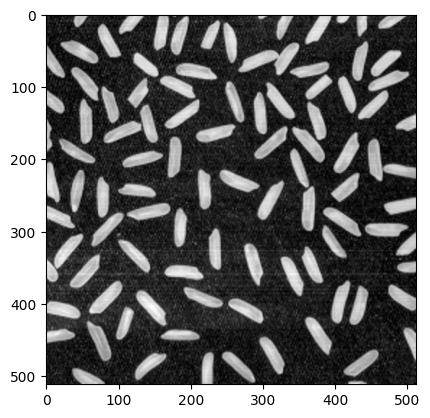

In [110]:
image_new_2 = filterImage(image_new)
image_new_2 = np.uint8(image_new_2)
plt.imshow(image_new_2, 'gray')

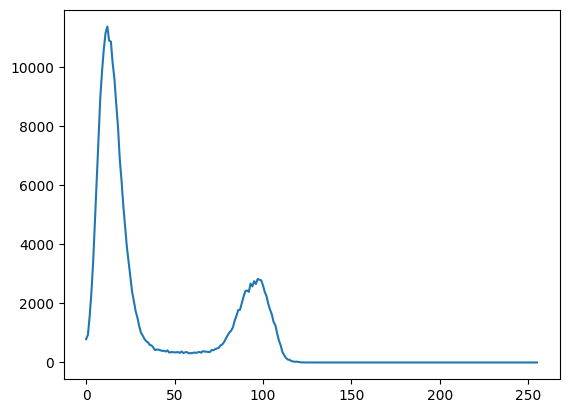

In [111]:
image_new_2 = np.uint8(image_new_2)
histg_1 = cv.calcHist([image_new_2],[0],None,[256],[0,256])
plt.plot(histg_1) 
plt.show()

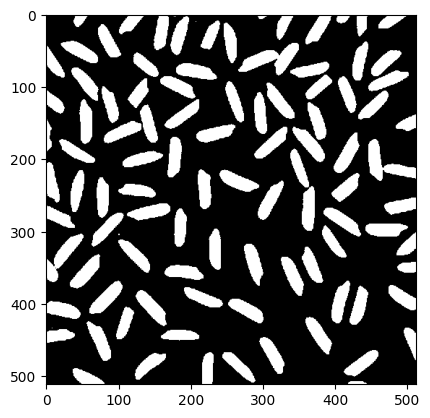

In [112]:
ret,thresh = cv.threshold(image_new_2,50,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(thresh, 'gray')

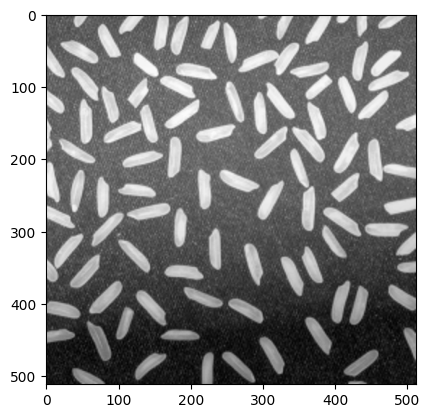

In [113]:
plt.imshow(image_new, 'gray')

In [61]:
#metodo otsu

th2 = cv.adaptiveThreshold(image_new,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,255,2)

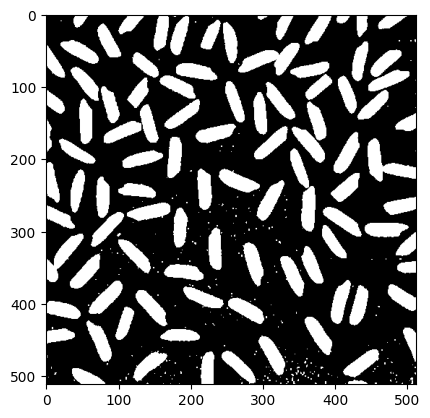

In [62]:
plt.imshow(th2, 'gray')

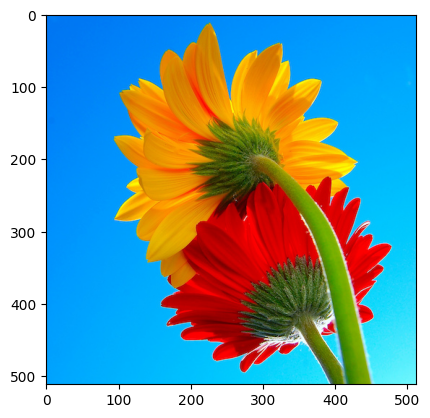

In [199]:
#Segmentación de color
imagen = cv.imread('imagenes/flowers.jpg')
imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB); #Cambio de formato
plt.imshow(imagen)

In [200]:
#Metodo 1
def obtenerCanaleColor(image, color):
    a,b,h = image.shape
    image_new = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            image_new[i,j] = image[i,j, color]
    return image_new

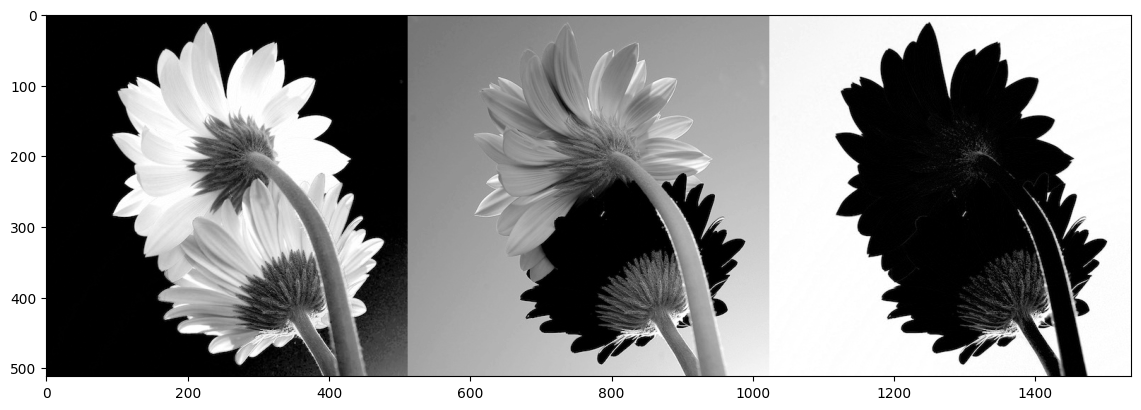

In [202]:
#Metodo 2
R = imagen[:,:,0]
G = imagen[:,:,1]
B = imagen[:,:,2]
CANAL_RGB = np.concatenate((R,G,B), axis=1)
plt.figure(figsize=(14, 8))  # Ancho: 10 pulgadas, Alto: 5 pulgadas
plt.imshow(CANAL_RGB, 'gray')

In [216]:
#Metodo uno para mostrar imagenes por canales
#titles = ['Rojo','Verde', 'Azul']
#for i in range(3):
#    plt.subplot(2,2,i+1),plt.imshow(obtenerCanaleColor(image, i),'gray')
#    plt.title(titles[i])
#    plt.xticks([]),plt.yticks([])
#plt.show()

IMAGEN GRIS

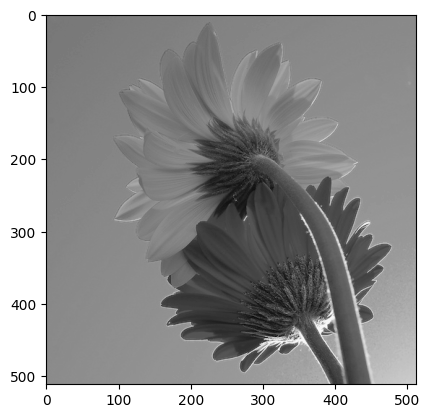

In [203]:
Rd = R.astype(float)
Gd = G.astype(float)
Bd = B.astype(float)
k = (1/3, 1/3, 1/3)
Zd = k[0]*Rd + k[1]*Gd + k[2]*Bd
Z = Zd.astype(int)
plt.imshow(Z, 'gray')

Histograma por todo de Gris

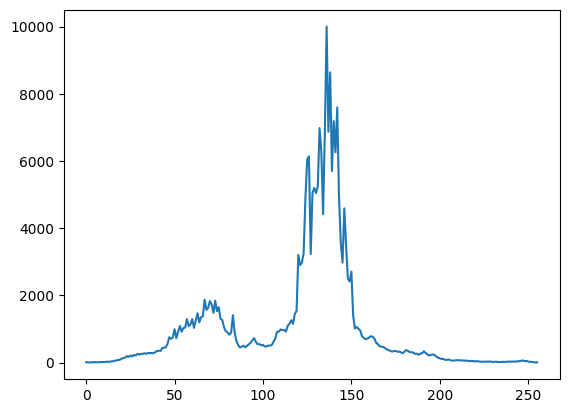

In [204]:
imhist(Z)

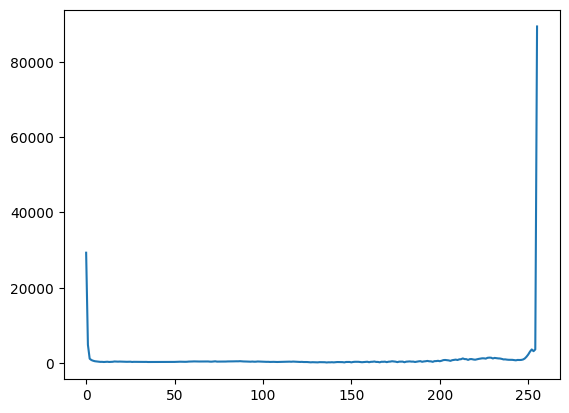

In [73]:
imhist(R)

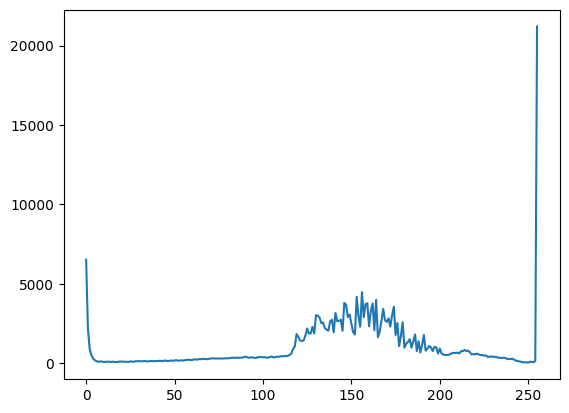

In [74]:
imhist(G)

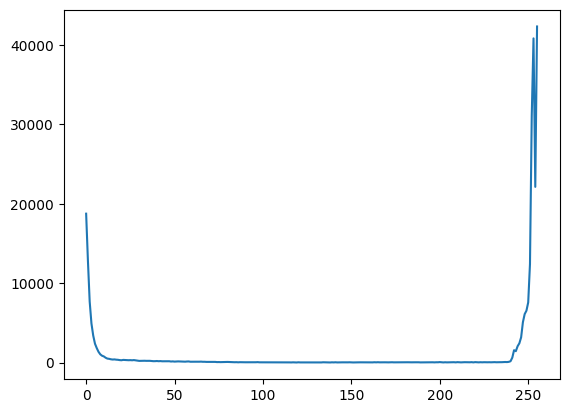

In [75]:
imhist(B)

Segmentar la flor de color Rojo

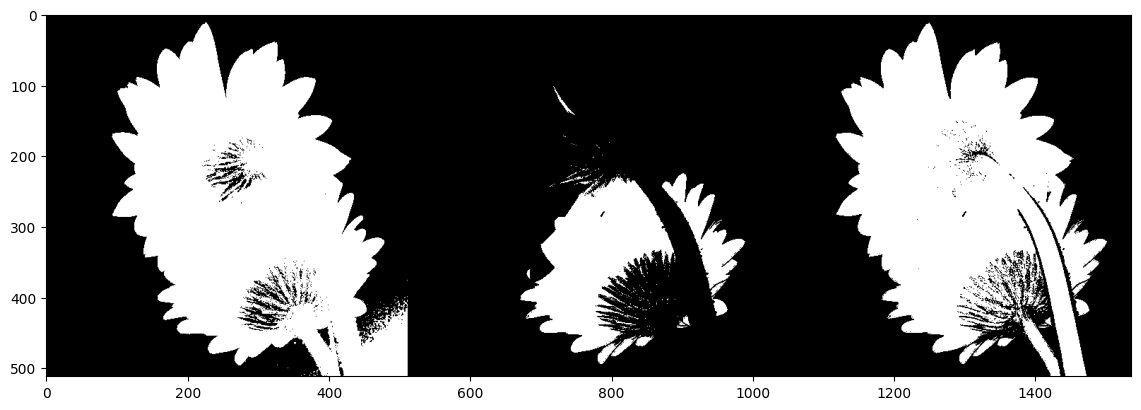

In [205]:
Sr = R > 50
Sg = G < 40
Sb = B < 40

Srgb = np.concatenate((Sr,Sg,Sb), axis = 1)
plt.figure(figsize=(14, 8))
plt.imshow(Srgb, "gray")

Operación booleana entre canales

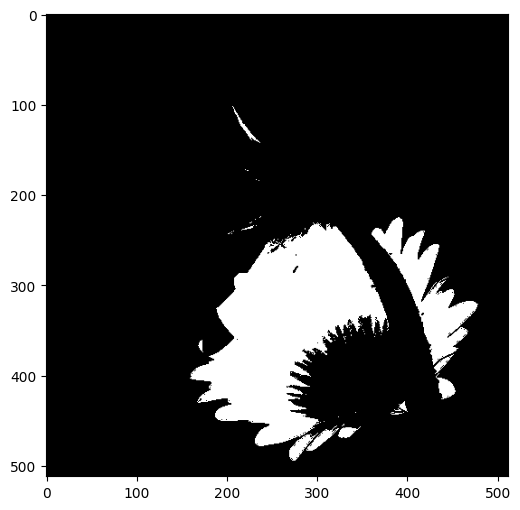

In [206]:
OPERACION_AND = Sr & Sg & Sb
OPERACION_AND_ = OPERACION_AND.astype(np.uint8)
plt.figure(figsize=(12, 6))
plt.imshow(OPERACION_AND_, "gray")

In [129]:
#OPERACION_AND_ = OPERACION_AND.astype(np.uint8)
#FILTRO = OPERACION_AND_ == 1
#OPERACION_AND_[FILTRO] = 255

OPERACION MORFOLÓGICA

In [132]:
#kernel = np.ones((3,3),np.uint8)
#erosion = cv.erode(OPERACION_AND_,kernel,iterations = 1)
#plt.imshow(erosion, 'gray')

In [207]:
OPERACION_AND_.shape

(512, 512)

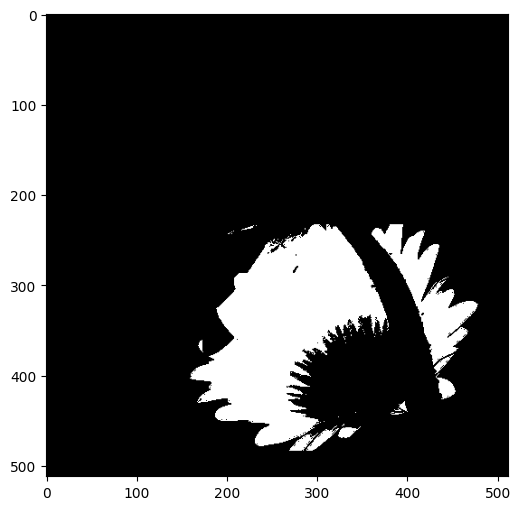

In [208]:
a,b = OPERACION_AND_.shape
for i in range(a):
    suma = np.sum(OPERACION_AND_[i])
    if suma < 20:
        OPERACION_AND_[i,:] = 0

plt.figure(figsize=(12, 6))
plt.imshow(OPERACION_AND_, "gray")    

In [209]:
print(OPERACION_AND_.shape)
a, b = OPERACION_AND_.shape
imin = a
imax = 0
jmin = b
jmax = 0
for i in range(a):
    sum = np.sum(OPERACION_AND_[:,i])
    if(sum > 0):
        if(imin > i):
            imin = i
        if(imax < i):
            imax = i

for j in range(b):
    sum = np.sum(OPERACION_AND_[j,:])
    if(sum > 0):
        if(jmin > j):
            jmin = j
        if(jmax < j):
            jmax = j

print(imin, imax)
print(jmin, jmax)



(512, 512)
159 477
233 483


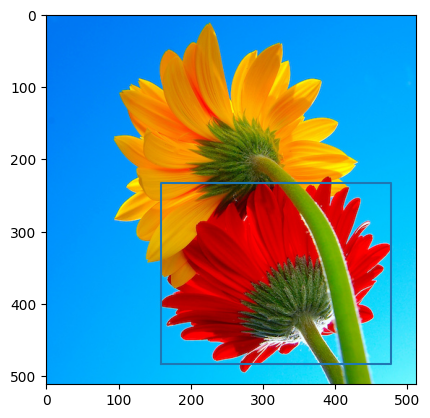

In [210]:
x = [imin,imin,imax,imax,imin]
y = [jmax,jmin,jmin,jmax,jmax]
plt.imshow(imagen)
plt.plot(x,y)
plt.show()

In [168]:
#ret,thresh1 = cv.threshold(image_red,200,260,cv.THRESH_BINARY)
#plt.imshow(thresh1, 'gray')

In [122]:
#Segementación color rojo, detección

(512, 512)


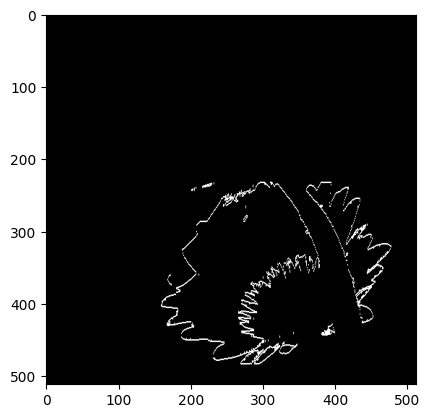

In [211]:
print(OPERACION_AND_.shape)
a, b = OPERACION_AND_.shape
imagen_borde = np.zeros((a,b), dtype = np.uint8)
for i in range(a):
    for j in range(b):
        if(i < b - 1):
            if(OPERACION_AND_[i,j] != OPERACION_AND_[i+1,j]):
                imagen_borde[i,j] = 1
                imagen_borde[i + 1, j] = 1

plt.imshow(imagen_borde, 'gray')

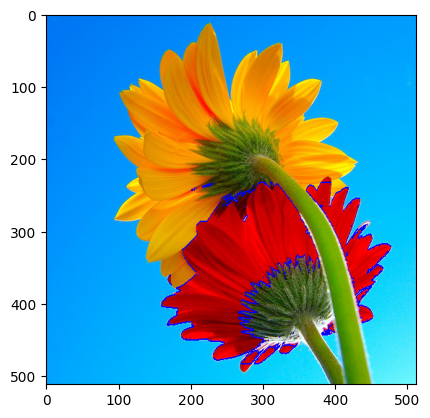

In [212]:
N, M, b = imagen.shape
imagen_new = imagen
for i in range(N):
    for j in range(M):
        if (imagen_borde[i,j] == 1):
            imagen_new[i,j,:] = [0,0,255]

plt.imshow(imagen_new)

In [215]:
#def obtenerImagenColoRojo(image):
#    a, b, h = image.shape
#    image_new = np.zeros((a,b))
#    for i in range(a):
#        for j in range(b):
#            red = image[i,j, 0]
#            green = image[i,j,1]
#            blue = image[i,j,2]
#            if red > 110 and green < 20 and blue < 20:
#                image_new[i,j] = red
#    return image_new

In [214]:
#image_red_new = obtenerImagenColoRojo(image);
#plt.imshow(image_red_new, 'gray')

In [213]:
#kernel = np.ones((3,3),np.uint8)
#erosion = cv.erode(image_red_new,kernel,iterations = 1)
#plt.imshow(erosion, 'gray')

In [38]:
pow(2,8)

256